Imports

In [1]:
import pysmurf.client
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import epics
import os

%matplotlib inline

Instantiate pysmurf

In [2]:
epics_prefix = "smurf_server_s2"
config_file  = "/usr/local/src/pysmurf/cfg_files/mit/experiment_mit.cfg"
S = pysmurf.client.SmurfControl(epics_root=epics_prefix, 
                                cfg_file=config_file, 
                                setup=False, 
                                make_logfile=False)

In [3]:
S.setup()

[ 2022-04-26 21:07:09 ]  Setting up...
[ 2022-04-26 21:07:09 ]  Toggling DACs
[ 2022-04-26 21:07:09 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[0] 1
[ 2022-04-26 21:07:09 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[1] 1
[ 2022-04-26 21:07:09 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[0] 0
[ 2022-04-26 21:07:09 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:DBG:dacReset[1] 0
[ 2022-04-26 21:07:09 ]  caput smurf_server_s2:AMCc:ReadAll 1
[ 2022-04-26 21:07:14 ]  Waiting 20.00 seconds after...
[ 2022-04-26 21:07:34 ]  Done waiting.
[ 2022-04-26 21:07:34 ]  caget smurf_server_s2:AMCc:SmurfApplication:SmurfVersion
[ 2022-04-26 21:07:34 ]  5.0.2
[ 2022-04-26 21:07:34 ]  caput smurf_server_s2:AMCc:setDefaults 1
[ 2022-04-26 21:08:08 ]  caget smurf_server_s2:AMCc:SmurfApplication:ConfiguringInProgress
[ 2022-04-26 21:08:08 ]

[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppTopJesd[0]:JesdTx:dataOutMux[7] UserData
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:dspEnable 1
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:CryoChannels:gradientDescentGain 0.0001
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:CryoChannels:gradientDescentAverages 1
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:CryoChannels:gradientDescentConvergeHz 500.0
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:CryoChannels:gradientDescentStepHz 1000.0
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:CryoChannels:gradientDescentMomentum 1
[ 2022-04-26 21:08:12 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:A

[ 2022-04-26 21:08:26 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:RtmCryoDet:RtmSpiMax:TesBiasDacCtrlRegCh[32] 2
[ 2022-04-26 21:08:26 ]  Setting 50K LNA Vg from config file to Vg=-0.740
[ 2022-04-26 21:08:26 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:RtmCryoDet:RtmSpiMax:TesBiasDacDataRegCh[32] -191749.5854063018
[ 2022-04-26 21:08:27 ]  {'hemt_Vg': 0.6099967296000001, 'hemt_Id': -0.941, '50K_Vg': -0.7399977408, '50K_Id': -0.4963}
[ 2022-04-26 21:08:27 ]  {'hemt_Vg': 0.6099967296000001, 'hemt_Id': -0.941, '50K_Vg': -0.7399977408, '50K_Id': -0.4963}
[ 2022-04-26 21:08:27 ]  Cryocard temperature = -8.928571428571429
[ 2022-04-26 21:08:27 ]  Configuring the system to take timing from ext_ref
[ 2022-04-26 21:08:27 ]  Select external reference for bay 0
[ 2022-04-26 21:08:32 ]  smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:MicrowaveMuxCore[0]:SelExtRef sent
[ 2022-04-26 21:08:32 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:RtmCryoDet:RampStartMo

True

In [4]:
S.all_off()

[ 2022-04-26 21:08:32 ]  Turning off tones
[ 2022-04-26 21:08:39 ]  Turning off flux ramp
[ 2022-04-26 21:08:39 ]  Turning off all TES biases


Serial eta scan enables feedback, so even though we instantiated this as a fixed tone, need to disable it's feedback again.

In [5]:
#S.set_feedback_enable_channel(band,channel,0)

### Resonator sensitivity based on Shawn's example

In [6]:
band = 2
S.set_att_uc(band,0)

[ 2022-04-26 21:08:41 ]  Sweeping across frequencies 5000.0MHz to 5500.0MHz
[ 2022-04-26 21:08:41 ]  Working on band 2
[ 2022-04-26 21:09:29 ]  serial find freq complete ; etaScanInProgress = 0


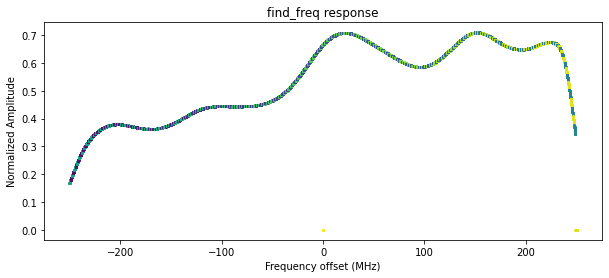

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]))

In [7]:
S.find_freq(band=band, tone_power=14, make_plot=True, show_plot=True)

In [8]:
S.setup_notches(band=band, tone_power=14, sweep_width=1, df_sweep=0.02, new_master_assignment=True)

[ 2022-04-26 21:10:21 ]  freq 5499.0000 - 1 of 1
[ 2022-04-26 21:10:21 ]  Writing new channel assignment to /data/smurf_data/tune/1651007421_channel_assignment_b2.txt
[ 2022-04-26 21:10:21 ]  Old master assignment file: /data/smurf_data/tune/1639862787_channel_assignment_b2.txt
[ 2022-04-26 21:10:21 ]  New master assignment file: /data/smurf_data/tune/1651007421_channel_assignment_b2.txt
[ 2022-04-26 21:10:25 ]  serial find freq complete ; etaScanInProgress = 0
[ 2022-04-26 21:10:25 ]  Assigning channels
[ 2022-04-26 21:10:25 ]  Writing new channel assignment to /data/smurf_data/tune/1651007425_channel_assignment_b2.txt
[ 2022-04-26 21:10:25 ]  Old master assignment file: /data/smurf_data/tune/1651007421_channel_assignment_b2.txt
[ 2022-04-26 21:10:25 ]  New master assignment file: /data/smurf_data/tune/1651007425_channel_assignment_b2.txt
[ 2022-04-26 21:10:25 ]  Saving to : /data/smurf_data/tune/1651007425_tune.npy
[ 2022-04-26 21:10:25 ]  Relocking...
[ 2022-04-26 21:10:32 ]  Settin

In [9]:
S.plot_tune_summary(band=band, eta_scan=True)

[ 2022-04-26 21:10:32 ]  Eta plot 1 of 1


In [10]:
S.run_serial_gradient_descent(band)

In [11]:
# run eta scan to normalize resonator gain (delta Q -> delta frequency) and apply rotation such that Q is nominally 0
S.run_serial_eta_scan(band)

In [12]:
channel = S.which_on(band=band)[0]
channel

22

In [13]:
eta_phase_deg = S.get_eta_phase_degree_channel(band,channel)
print('b{}ch{} eta_phase_deg={:.2f}'.format(band,channel,eta_phase_deg))

b2ch22 eta_phase_deg=0.00


In [14]:
S.set_feedback_limit_khz(band,800)

[ 2022-04-26 21:11:04 ]  Using LMS gain is now an advanced feature.
[ 2022-04-26 21:11:04 ]  Unless you are an expert, you probably want feedback_gain.
[ 2022-04-26 21:11:04 ]  See tracking_setup docstring.
[ 2022-04-26 21:11:04 ]  Percent full scale = 65.000%
[ 2022-04-26 21:11:05 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:singleChannelReadout 0
[ 2022-04-26 21:11:05 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:SysgenCryo:Base[2]:singleChannelReadoutOpt2 0
[ 2022-04-26 21:11:05 ]  Writing to file : /data/smurf_data/20220426/1651007224/outputs/1651007465.dat
[ 2022-04-26 21:11:05 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:DaqMuxV2[0]:DataBufferSize 524288
[ 2022-04-26 21:11:05 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:DebugSelect[0] 2
[ 2022-04-26 21:11:05 ]  Data acquisition in progress...
[ 2022-04-26 21:11:05 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:DaqMuxV2[0]:TriggerDaq 1
[ 2022-04-26 21:11:06 ]  Done t

ValueError: zero-size array to reduction operation maximum which has no identity

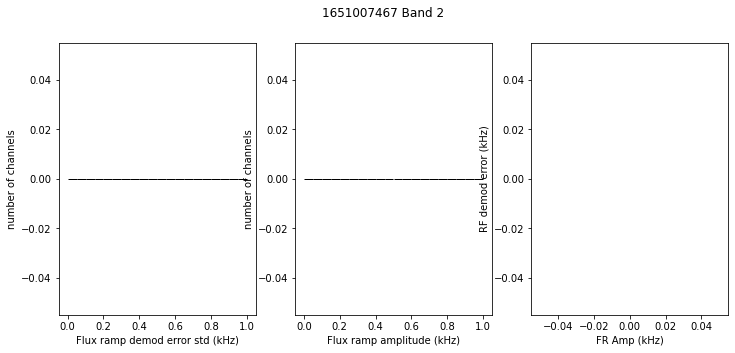

In [15]:
file_loc = S.tracking_setup(band=band, 
                            channel=channel, 
                            reset_rate_khz=4, 
                            fraction_full_scale=0.65, 
                            lms_freq_hz=16e3, 
                            meas_flux_ramp_amp=False, 
                            make_plot=True, lms_gain=0, 
                            feedback_start_frac=0.125, 
                            feedback_end_frac=1-0.125, 
                            lms_enable1=1, 
                            lms_enable2=1, 
                            lms_enable3=1)

In [16]:
fileloc, params = S.take_noise_psd(meas_time=60,
                                   return_noise_params=True,
                                   channel=channel)

[ 2022-04-26 21:11:15 ]  Starting to take data.
[ 2022-04-26 21:11:15 ]  Input downsample factor is None. Using value already in pyrogue: 20
[ 2022-04-26 21:11:15 ]  FLUX RAMP IS DC COUPLED.
[ 2022-04-26 21:11:15 ]  caput smurf_server_s2:AMCc:SmurfProcessor:Unwrapper:reset 1
[ 2022-04-26 21:11:15 ]  caput smurf_server_s2:AMCc:SmurfProcessor:Filter:reset 1
[ 2022-04-26 21:11:15 ]  Writing to file : /data/smurf_data/20220426/1651007224/outputs/1651007476.dat
[ 2022-04-26 21:11:17 ]  /data/smurf_data/20220426/1651007224/outputs/1651007476_mask.txt
[ 2022-04-26 21:11:17 ]  Writing frequency mask.
[ 2022-04-26 21:11:18 ]  caput smurf_server_s2:AMCc:SmurfProcessor:FileWriter:Open 1
[ 2022-04-26 21:12:18 ]  caput smurf_server_s2:AMCc:SmurfProcessor:FileWriter:Close 1
[ 2022-04-26 21:12:18 ]  caput smurf_server_s2:AMCc:FpgaTopLevel:AppTop:AppCore:enableStreaming 0
[ 2022-04-26 21:12:18 ]  Waiting 0.15 seconds after...
[ 2022-04-26 21:12:18 ]  Done waiting.
[ 2022-04-26 21:12:18 ]  Done taking 

/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


In [17]:
psd_data = S.read_stream_data(fileloc)
print(len(psd_data))
for dat_i in psd_data:
    print(dat_i.dtype, dat_i.shape)
    #plt.plot(dat_i)
    #plt.show()
params[1][1][0]

[ 2022-04-26 21:15:59 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007476.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007476.dat
[ 2022-04-26 21:15:59 ]  2048 elements loaded
[ 2022-04-26 21:15:59 ]  4096 elements loaded
[ 2022-04-26 21:15:59 ]  6144 elements loaded
[ 2022-04-26 21:15:59 ]  8192 elements loaded
[ 2022-04-26 21:16:00 ]  10240 elements loaded
Processed 12013 data records from /data/smurf_data/20220426/1651007224/outputs/1651007476.dat
Processed a total of 12013 data records
3
int64 (12013,)
float64 (1, 12013)
int64 (3, 512)


0.0

In [19]:
# Noise floor dependence on tone power using attenuation
# range 0 to 31, steps of 0.5dB, 31 corresponding to 15.5dB 
param_list = []

for atten in np.arange(30,-2,-2):
    print(atten)
    S.set_att_uc(band,atten)
    S.run_serial_gradient_descent(band)
    S.run_serial_eta_scan(band)
    #S.tracking_setup(band=band, 
    #                 channel=channel, 
    #                 reset_rate_khz=4, 
    #                 fraction_full_scale=0.65, 
    #                 lms_freq_hz=16e3, 
    #                 meas_flux_ramp_amp=False, 
    #                 make_plot=True, lms_gain=0, 
    #                 feedback_start_frac=0.125, 
    #                 feedback_end_frac=1-0.125, 
    #                 lms_enable1=1, 
    #                 lms_enable2=1, 
    #                 lms_enable3=1)
    fileloc, params = S.take_noise_psd(channel=channel,
                                       meas_time=2,
                                       save_data=True,
                                       show_plot=True,
                                       make_channel_plot=True,
                                       make_summary_plot=False,
                                       return_noise_params=True,
                                       write_log=False)
    param_list.append(params)

30
[ 2022-04-26 21:17:01 ]  /data/smurf_data/20220426/1651007224/outputs/1651007820_mask.txt
[ 2022-04-26 21:17:03 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007820.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007820.dat
Processed 398 data records from /data/smurf_data/20220426/1651007224/outputs/1651007820.dat
Processed a total of 398 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 398, using nperseg = 398
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


28
[ 2022-04-26 21:17:16 ]  /data/smurf_data/20220426/1651007224/outputs/1651007835_mask.txt
[ 2022-04-26 21:17:18 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007835.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007835.dat
Processed 400 data records from /data/smurf_data/20220426/1651007224/outputs/1651007835.dat
Processed a total of 400 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 400, using nperseg = 400
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


26
[ 2022-04-26 21:17:31 ]  /data/smurf_data/20220426/1651007224/outputs/1651007850_mask.txt
[ 2022-04-26 21:17:33 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007850.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007850.dat
Processed 399 data records from /data/smurf_data/20220426/1651007224/outputs/1651007850.dat
Processed a total of 399 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 399, using nperseg = 399
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


24
[ 2022-04-26 21:17:46 ]  /data/smurf_data/20220426/1651007224/outputs/1651007865_mask.txt
[ 2022-04-26 21:17:48 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007865.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007865.dat
Processed 404 data records from /data/smurf_data/20220426/1651007224/outputs/1651007865.dat
Processed a total of 404 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 404, using nperseg = 404
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


22
[ 2022-04-26 21:18:01 ]  /data/smurf_data/20220426/1651007224/outputs/1651007880_mask.txt
[ 2022-04-26 21:18:03 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007880.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007880.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651007880.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


20
[ 2022-04-26 21:18:16 ]  /data/smurf_data/20220426/1651007224/outputs/1651007895_mask.txt
[ 2022-04-26 21:18:18 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007895.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007895.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651007895.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


18
[ 2022-04-26 21:18:31 ]  /data/smurf_data/20220426/1651007224/outputs/1651007910_mask.txt
[ 2022-04-26 21:18:33 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007910.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007910.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651007910.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


16
[ 2022-04-26 21:18:46 ]  /data/smurf_data/20220426/1651007224/outputs/1651007925_mask.txt
[ 2022-04-26 21:18:48 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007925.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007925.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651007925.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


14
[ 2022-04-26 21:19:01 ]  /data/smurf_data/20220426/1651007224/outputs/1651007940_mask.txt
[ 2022-04-26 21:19:03 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007940.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007940.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651007940.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


12
[ 2022-04-26 21:19:16 ]  /data/smurf_data/20220426/1651007224/outputs/1651007955_mask.txt
[ 2022-04-26 21:19:18 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007955.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007955.dat
Processed 400 data records from /data/smurf_data/20220426/1651007224/outputs/1651007955.dat
Processed a total of 400 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 400, using nperseg = 400
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


10
[ 2022-04-26 21:19:31 ]  /data/smurf_data/20220426/1651007224/outputs/1651007970_mask.txt
[ 2022-04-26 21:19:33 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007970.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007970.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651007970.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


8
[ 2022-04-26 21:19:46 ]  /data/smurf_data/20220426/1651007224/outputs/1651007985_mask.txt
[ 2022-04-26 21:19:48 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651007985.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651007985.dat
Processed 404 data records from /data/smurf_data/20220426/1651007224/outputs/1651007985.dat
Processed a total of 404 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 404, using nperseg = 404
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


6
[ 2022-04-26 21:20:01 ]  /data/smurf_data/20220426/1651007224/outputs/1651008000_mask.txt
[ 2022-04-26 21:20:03 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651008000.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651008000.dat
Processed 400 data records from /data/smurf_data/20220426/1651007224/outputs/1651008000.dat
Processed a total of 400 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 400, using nperseg = 400
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


4
[ 2022-04-26 21:20:16 ]  /data/smurf_data/20220426/1651007224/outputs/1651008015_mask.txt
[ 2022-04-26 21:20:18 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651008015.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651008015.dat
Processed 400 data records from /data/smurf_data/20220426/1651007224/outputs/1651008015.dat
Processed a total of 400 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 400, using nperseg = 400
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


2
[ 2022-04-26 21:20:31 ]  /data/smurf_data/20220426/1651007224/outputs/1651008030_mask.txt
[ 2022-04-26 21:20:33 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651008030.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651008030.dat
Processed 400 data records from /data/smurf_data/20220426/1651007224/outputs/1651008030.dat
Processed a total of 400 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 400, using nperseg = 400
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


0
[ 2022-04-26 21:20:46 ]  /data/smurf_data/20220426/1651007224/outputs/1651008045_mask.txt
[ 2022-04-26 21:20:48 ]  Reading /data/smurf_data/20220426/1651007224/outputs/1651008045.dat
Processing data records from /data/smurf_data/20220426/1651007224/outputs/1651008045.dat
Processed 401 data records from /data/smurf_data/20220426/1651007224/outputs/1651008045.dat
Processed a total of 401 data records


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 4096 is greater than input length  = 401, using nperseg = 401
  .format(nperseg, input_length))
/usr/local/src/pysmurf/python/pysmurf/client/debug/smurf_noise.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ylim = ax[1].get_ylim()


In [ ]:
for param in param_list:
    print(param[1][1][0])